# Master Data Science Data_VIZ
### WADE El Hadji Malick
### HAYKAL Fayad

## 1. Nettoyage des données 

In [15]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_School = "/users/mmath/wade/Bureau/Master_DS/Projets/Data_viz/Synthese_donnees_des_semis.csv"
path_Home = "/home/malick/Bureau/Projets/Projets_Malick_fayad/Data_viz/Synthese_donnees_des_semis.csv"

df = pd.read_csv(path_Home,  sep='\t',  decimal=",")

df.head(10)

,Bancs,camera,zone,Pop,5_degres_C_TMG_h,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3.0,1.0,11.0,Témoin,414.00,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3.0,2.0,11.0,Témoin,430.86,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3.0,3.0,11.0,Témoin,382.86,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3.0,4.0,11.0,Témoin,420.00,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4.0,1.0,11.0,Témoin,432.89,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0
5,4.0,2.0,11.0,Témoin,413.82,17.24,2646.0,8.0,12.0,20.0,32.0,36.0,36.0,44.0
6,4.0,3.0,11.0,Témoin,446.80,18.62,2646.0,4.0,4.0,8.0,16.0,20.0,24.0,40.0
7,4.0,4.0,11.0,Témoin,429.60,17.90,2646.0,0.0,0.0,8.0,8.0,12.0,20.0,20.0
8,3.0,1.0,11.0,Témoin,354.22,14.76,5731.2,16.0,28.0,28.0,32.0,36.0,36.0,36.0
9,3.0,2.0,26.0,Témoin,377.78,15.74,5731.2,12.0,20.0,20.0,20.0,32.0,36.0,36.0


In [16]:
df.dtypes

Bancs                  float64
camera                 float64
zone                   float64
Pop                     object
5_degres_C_TMG_h       float64
5_degres_C_TMG_j       float64
Aire_sous_la_courbe    float64
15_j                   float64
16_j                   float64
17_j                   float64
18_j                   float64
19_j                   float64
20_j                   float64
21_j                   float64
dtype: object

In [17]:
df.isnull().sum()

Bancs                  1
camera                 1
zone                   1
Pop                    0
5_degres_C_TMG_h       2
5_degres_C_TMG_j       2
Aire_sous_la_courbe    1
15_j                   1
16_j                   1
17_j                   1
18_j                   1
19_j                   1
20_j                   1
21_j                   1
dtype: int64

On voit que notre jeux de données posséde des lignes avec avec au moins un e valeur manquante.  
On choisit de les supprimer, ce qui représente une perte de 2 lignes d'observations de données

In [18]:
Perte_de_donnees = df.shape[0]
df = df.dropna()
Perte_de_donnees = (Perte_de_donnees - df.shape[0])/100

print("En supprimant les lignes avec des valeurs manquantes, on a une perte de données de ", Perte_de_donnees,"%")

En supprimant les lignes avec des valeurs manquantes, on a une perte de données de  0.02 %


In [19]:
df.isnull().sum()

Bancs                  0
camera                 0
zone                   0
Pop                    0
5_degres_C_TMG_h       0
5_degres_C_TMG_j       0
Aire_sous_la_courbe    0
15_j                   0
16_j                   0
17_j                   0
18_j                   0
19_j                   0
20_j                   0
21_j                   0
dtype: int64

In [20]:
    col_pairplot = ["5_degres_C_TMG_h", "5_degres_C_TMG_j", "Aire_sous_la_courbe", "15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

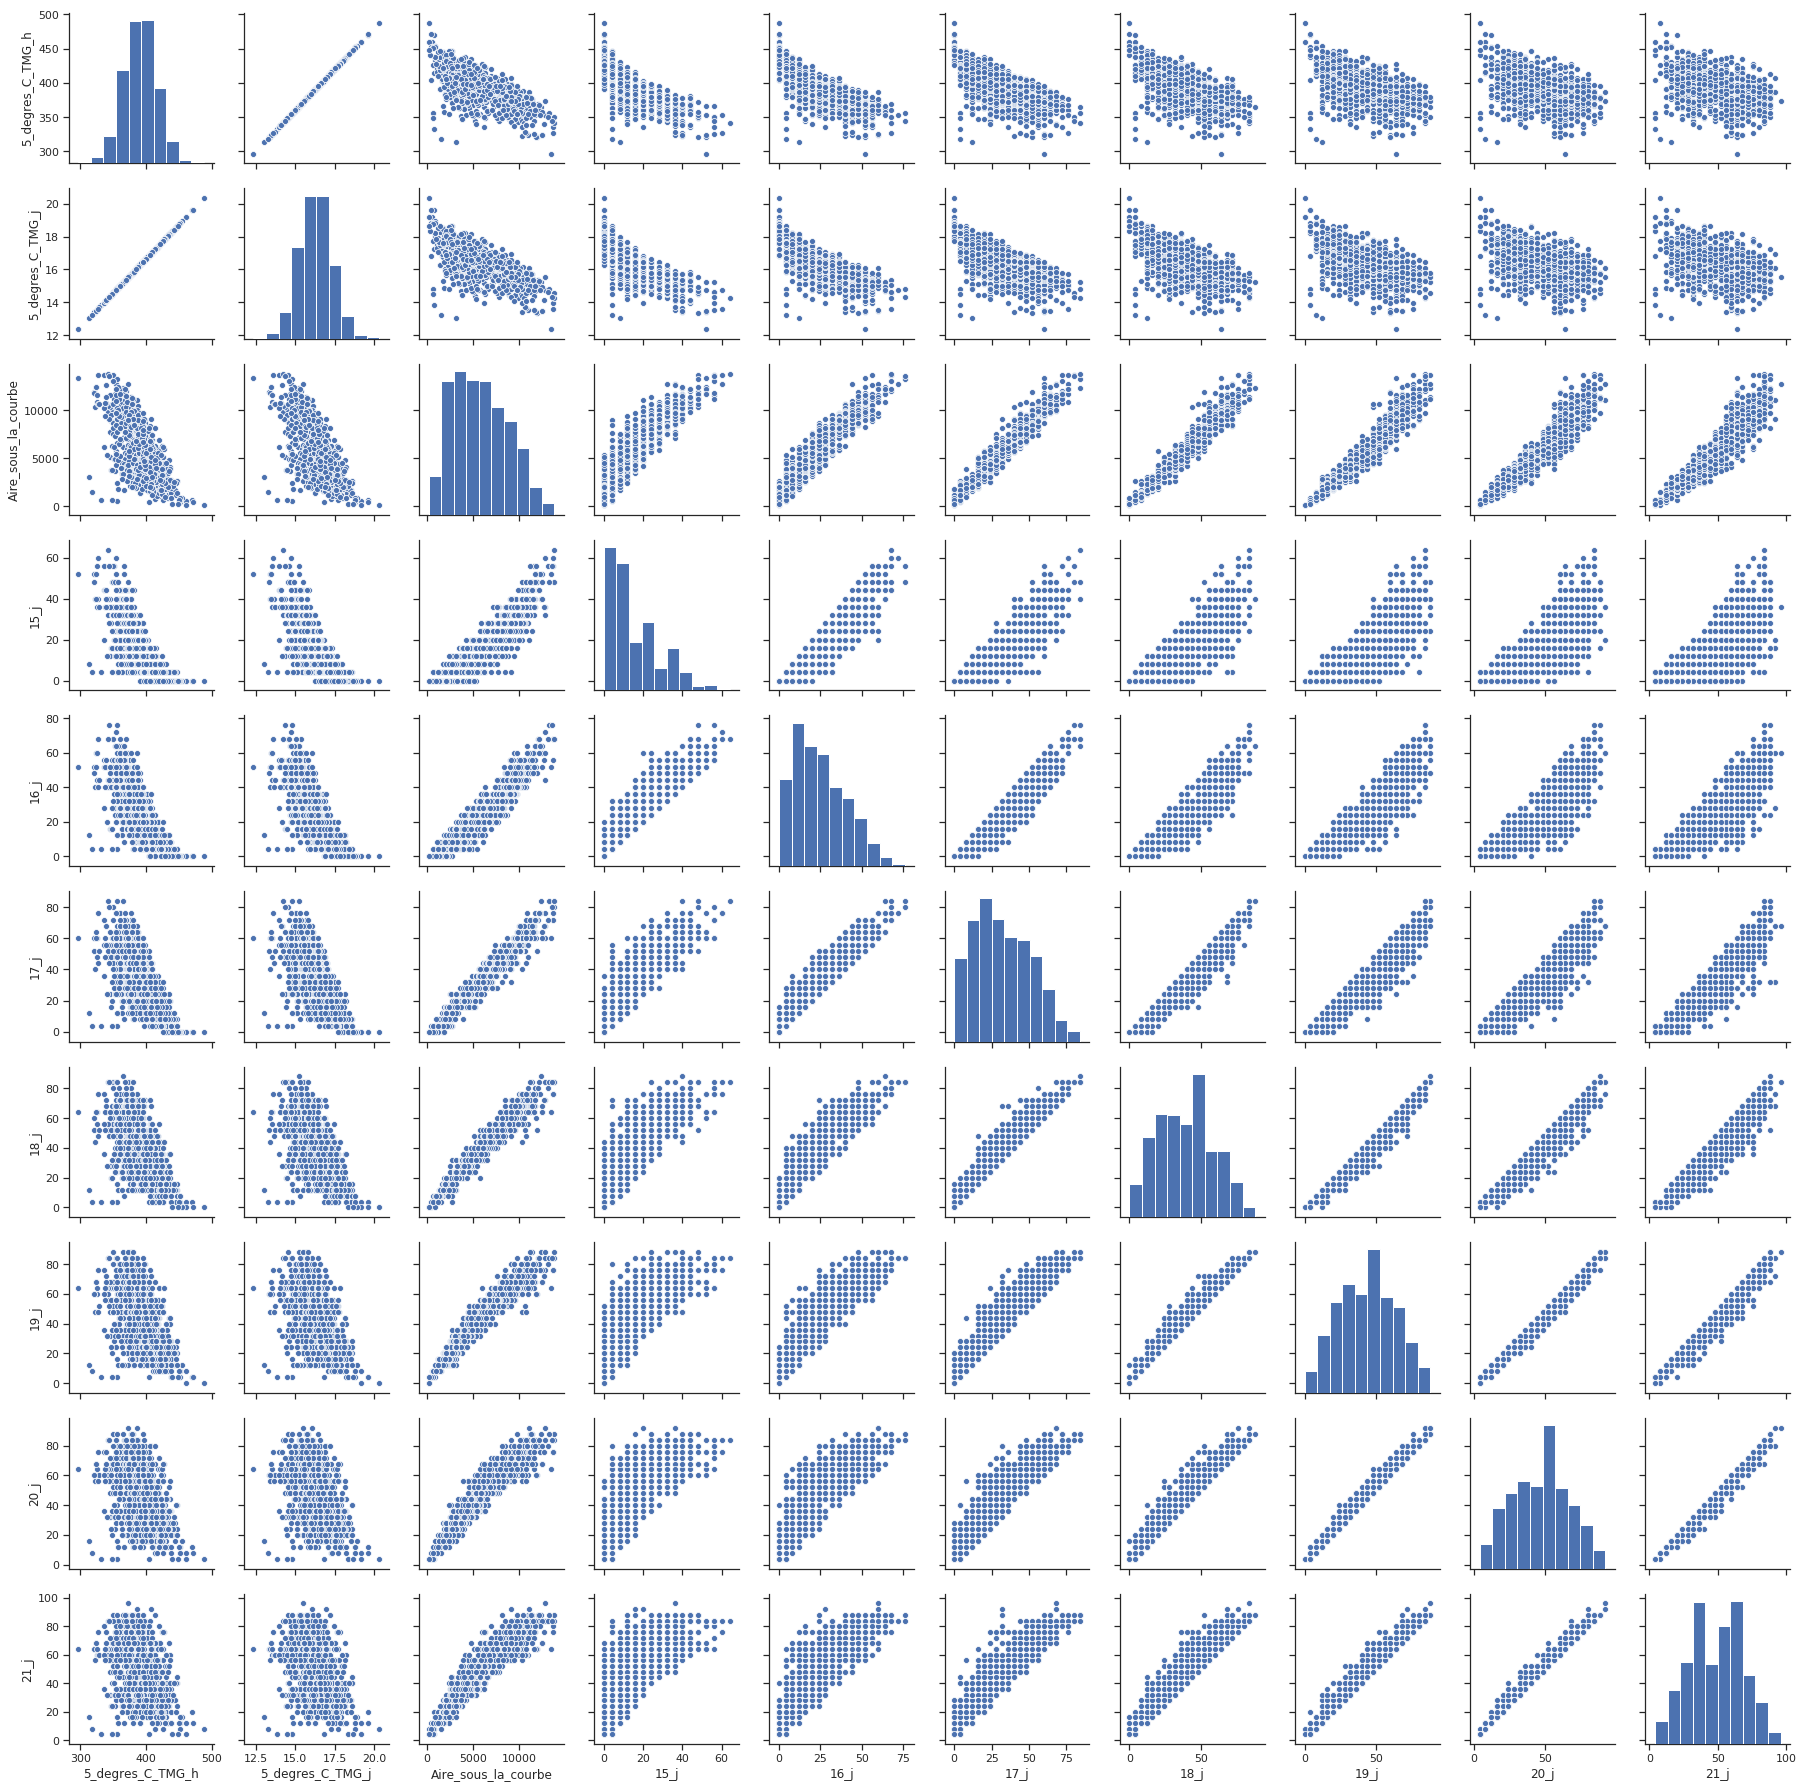

In [21]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df[col_pairplot])

## 2. Réduction de dimensions

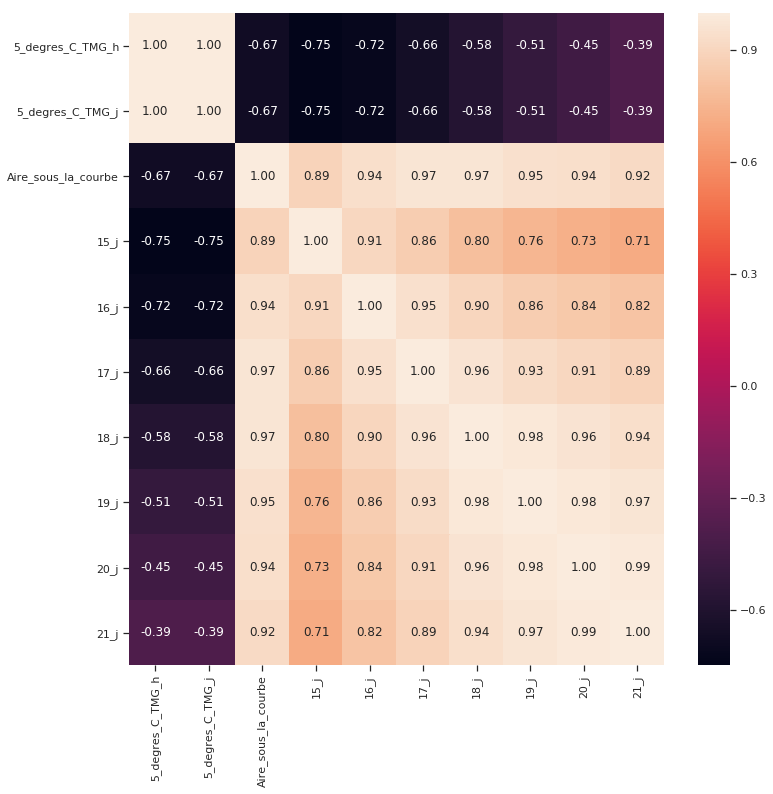

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(12, 12))

sns.heatmap(round(df[col_pairplot].corr(),2), annot=True, fmt=".2f")
plt.show()

In [23]:
df.drop(["5_degres_C_TMG_h"], axis = 1, inplace = True) 

In [24]:
from sklearn.decomposition import PCA

Col_ACP = ["Aire_sous_la_courbe", "15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]
ACP = PCA(n_components=8)
ACP.fit(df[Col_ACP])

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
ACP.explained_variance_ratio_

array([9.99971738e-01, 1.81432405e-05, 4.36917938e-06, 2.33031485e-06,
       1.39863378e-06, 1.03039712e-06, 6.57149273e-07, 3.33244125e-07])

On voit que 

In [12]:
9.99

9.99

## 3. Graphes

## 4. Prédictions avec X(G)Boost